In [1]:
import matplotlib.pyplot as plt
import datetime
import os
import json
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    classification_report,
)
import numpy as np
from main_pygod import get_data_from_loader, load_dataset, make_loader, create_model, train_model, test_model
import warnings

In [2]:
def create_metrics():
    return {"overall": {"roc_auc": [], "accuracy": [],"f1": [], "precision": [], "recall": []},
            "licit": {"precision": [], "recall": [],"f1-score": []}, 
           "illicit":{"precision": [], "recall": [],"f1-score": []}}

def hyperparameter_loop(group_para, parameter, parameter_list, metrics):
    """ 
    Run a grid search for a hyperparameter
    Args: hyperparameter, hyperparameter list, classification metrics (empty dict)
    Returns: Classification metrics dictionary
    """ 
    warnings.filterwarnings('ignore')
    for i in range(len(parameter_list)):
        config[group_para][parameter] = parameter_list[i]
        timestamp = config["model"]["backbone"]+"_hid_dim"+str(config["model"]["hid_dim"])+"_num_l"+str(config["model"]["num_layers"])
        timestamp += "_dropout"+str(config["model"]["dropout"])+ "_epoch"+str(config["model"]["epoch"])
        dataset, input_nodes = load_dataset(mask="train",use_aggregated=config["data"]["use_aggregated"],use_temporal=config["data"]["use_temporal"])
        loader = make_loader(data=dataset, loader_type='neighbor', batch_size=config["data"]["batch_size"], input_nodes=input_nodes)
        train_data = get_data_from_loader(loader)

        mymodel = create_model(config=config["model"])

        trained_model = train_model(mymodel, train_data, output_directory=config["training"]["save_dir"], 
                                    save_embeddings=config["training"]["save_embeddings"], timestamp=timestamp)
        
        dataset, input_nodes = load_dataset(mask="test",use_aggregated=config["data"]["use_aggregated"],
        use_temporal=config["data"]["use_temporal"])
        loader = make_loader(data=dataset, loader_type='neighbor', batch_size=config["data"]["batch_size"], input_nodes=input_nodes,)    
        test_data = get_data_from_loader(loader)

        test_metrics = test_model(model=trained_model, data=test_data, output_directory=config["training"]["save_dir"], timestamp=timestamp)

        for key in list(test_metrics.keys())[0:-1]:
            metrics["overall"][key].append(test_metrics[key])
        output = test_metrics["classification_report"]
        for key in list(output["0"].keys())[0:-1]:
            metrics["licit"][key].append(output["0"][key])
            metrics["illicit"][key].append(output["1"][key])
            
    return metrics

def plot_metrics(metrics, para_list, parameter, x_log = False):
    """
    Plot the classification metrics
    Args:classification metrics
    Returns:None
    """ 

    size = (8,3)
    plt.figure(figsize= size)
    for key in list(metrics["overall"]):
        plt.plot(para_list, metrics["overall"][key], label= key)
    plt.xlabel(parameter)
    plt.ylabel("Total Metrics")
    if x_log:  plt.xscale("log")
    plt.title("Overall Classification Metrics")
    plt.legend(loc=(1.04, 0))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize= size)
    for key in list(metrics["licit"]):
        plt.plot(para_list, metrics["licit"][key], label= key)
    plt.xlabel(parameter)
    plt.ylabel("Licit Metrics")
    if x_log:  plt.xscale("log")
    plt.title("Licit Classification Metrics")
    plt.legend(loc=(1.04, 0))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize= size)
    for key in list(metrics["illicit"]):
        plt.plot(para_list, metrics["illicit"][key], label= key)
    plt.xlabel(parameter)
    plt.ylabel("Illicit Metrics")
    if x_log:  plt.xscale("log")
    plt.title("Illicit Classification Metrics")
    plt.legend(loc=(1.04, 0))
    plt.tight_layout()
    plt.show()

## Base DOMINANT

In [ ]:
config = {
        "model": {
            "hid_dim": 128,
            "num_layers": 5,
            "dropout": 0.2,
            "weight_decay": 0.0,
            "contamination": 0.1,
            "backbone": "gcn",
            "lr": 0.005,
            "epoch": 30,
            "gpu":0.9,
            "batch_size": 2048,
            "num_neigh": 10,
            "weight": 0.5,
            "verbose": 1,
        },
        "data": {
            "use_aggregated": False,
            "use_temporal": False,
            "batch_size": 10000
        },
        "training": {
            "save_embeddings": False,
            "save_dir": "./saved_models",
        },
        "classifiers": ["rf", "mlp"],
    }

#### Number of layers

In [6]:
metrics = create_metrics()
para_change = "num_layers"
para_list = [3,4,5,6]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[20153, 93], edge_index=[2, 19910], y=[20153])
creating model with {'hid_dim': 128, 'num_layers': 3, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x000001C3B506C8B0>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 30, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'torch_geometric.nn.models.basic_gnn.GCN'>}
training model...
Epoch 0000: Loss 3623.4482 | 
Epoch 0001: Loss 3729.8411 | 
Epoch 0002: Loss 797.7504 | 
Epoch 0003: Loss 318.3305 | 
Epoch 0004: Loss 199.2115 | 
Epoch 0005: Loss 120.9127 | 
Epoch 0006: Loss 90.2977 | 
Epoch 0007: Loss 82.6883 | 
Epoch 0008: Loss 93.8469 | 
Epoch 0009: Loss 139.7418 | 
Epoch 0010: Loss 193.4934 | 
Epoch 0011: Loss 208.3348 | 
Epoch 0012: Loss 115.3472 | 
Epoch 0013: Loss 66.1737 | 
Epoch 0014: Loss 58.1780 | 
Epoch 0015: Loss 64.4544 | 
Epoch 0016: Loss 78.9093 | 
Epoch 0017: Loss 95.8920 | 
Epoch 0018: Loss 99.3246 | 
Epoch 0019: L

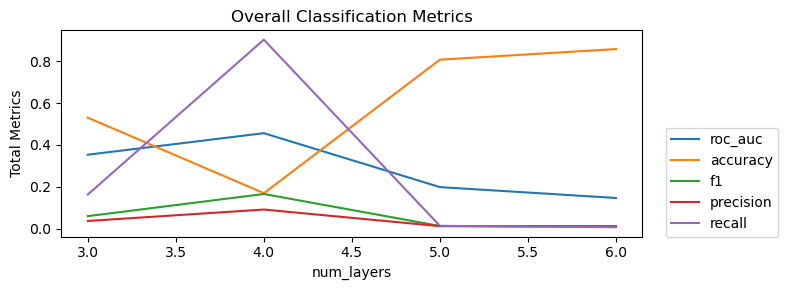

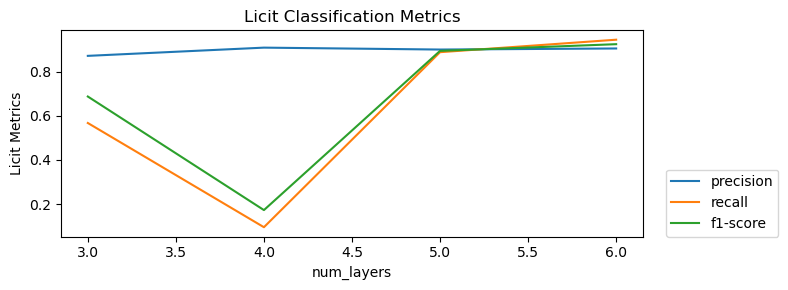

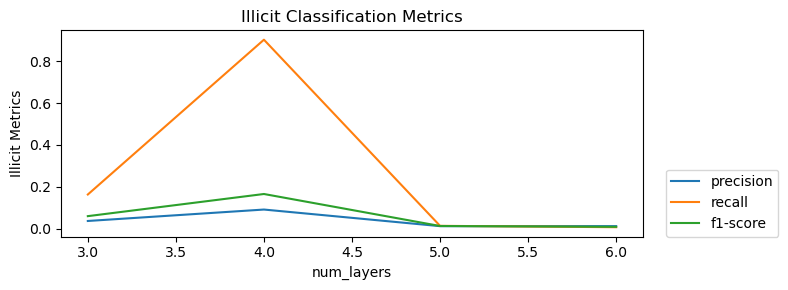

In [7]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Hidden Dimension

In [9]:
metrics = create_metrics()
para_change = "hid_dim"
para_list = [64, 128, 256, 512, 1024]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[20166, 93], edge_index=[2, 19946], y=[20166])
creating model with {'hid_dim': 64, 'num_layers': 6, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x000001C3B506C8B0>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 30, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'torch_geometric.nn.models.basic_gnn.GCN'>}
training model...
Epoch 0000: Loss 255.1987 | 
Epoch 0001: Loss 13.8927 | 
Epoch 0002: Loss 6.4511 | 
Epoch 0003: Loss 5.2651 | 
Epoch 0004: Loss 4.9614 | 
Epoch 0005: Loss 4.7904 | 
Epoch 0006: Loss 4.7475 | 
Epoch 0007: Loss 4.6490 | 
Epoch 0008: Loss 4.7338 | 
Epoch 0009: Loss 4.5953 | 
Epoch 0010: Loss 4.6015 | 
Epoch 0011: Loss 4.5858 | 
Epoch 0012: Loss 4.5437 | 
Epoch 0013: Loss 4.5401 | 
Epoch 0014: Loss 4.4842 | 
Epoch 0015: Loss 4.5066 | 
Epoch 0016: Loss 4.4550 | 
Epoch 0017: Loss 4.4484 | 
Epoch 0018: Loss 4.3840 | 
Epoch 0019: Loss 4.3755 | 
Epoch 0020: Los

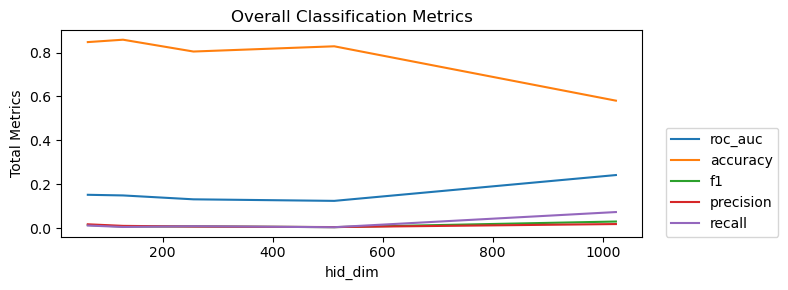

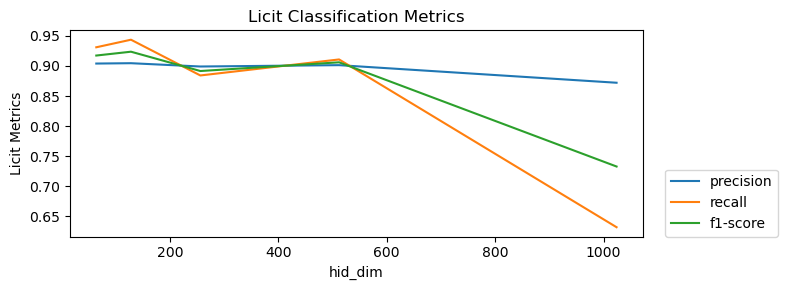

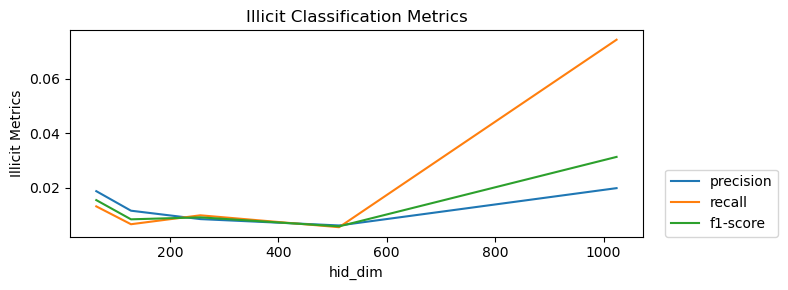

In [10]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Dropout

In [12]:
metrics = create_metrics()
para_change = "dropout"
para_list = [0.1, 0.15, 0.2]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[20166, 93], edge_index=[2, 19946], y=[20166])
creating model with {'hid_dim': 1024, 'num_layers': 6, 'dropout': 0.1, 'weight_decay': 0.0, 'act': <function relu at 0x000001C3B506C8B0>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 30, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'torch_geometric.nn.models.basic_gnn.GCN'>}
training model...
Epoch 0000: Loss 232528.8896 | 
Epoch 0001: Loss 38.7125 | 
Epoch 0002: Loss 24.0550 | 
Epoch 0003: Loss 11.3983 | 
Epoch 0004: Loss 8.9333 | 
Epoch 0005: Loss 7.9462 | 
Epoch 0006: Loss 7.2381 | 
Epoch 0007: Loss 6.8919 | 
Epoch 0008: Loss 6.5580 | 
Epoch 0009: Loss 6.2969 | 
Epoch 0010: Loss 6.2036 | 
Epoch 0011: Loss 6.1248 | 
Epoch 0012: Loss 6.6781 | 
Epoch 0013: Loss 5.9883 | 
Epoch 0014: Loss 5.9060 | 
Epoch 0015: Loss 5.7989 | 
Epoch 0016: Loss 5.7666 | 
Epoch 0017: Loss 5.7698 | 
Epoch 0018: Loss 6.2176 | 
Epoch 0019: Loss 5.6878 | 
Epoch 00

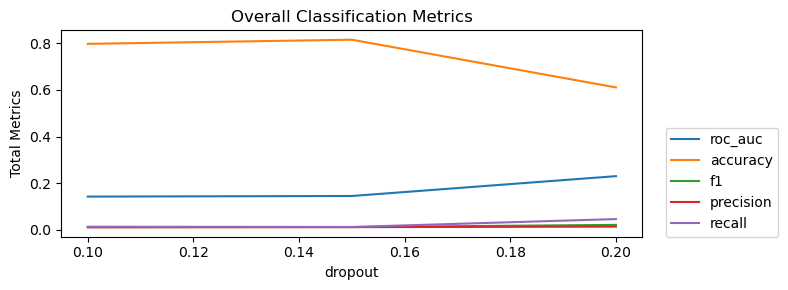

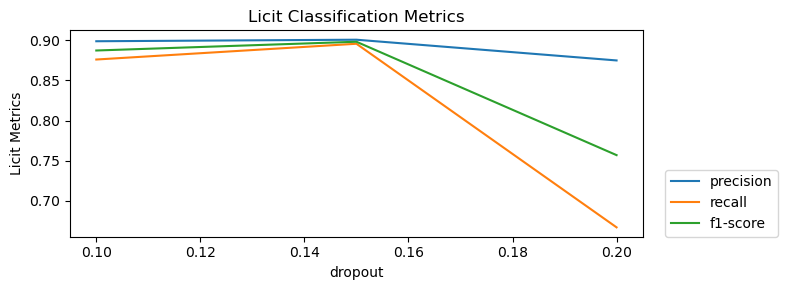

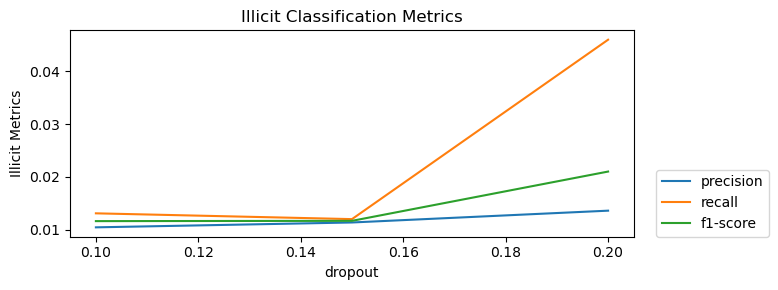

In [13]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Number of neighbors

In [15]:
metrics = create_metrics()
para_change = "num_neigh"
para_list = [10,15]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[20166, 93], edge_index=[2, 19946], y=[20166])
creating model with {'hid_dim': 1024, 'num_layers': 6, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x000001C3B506C8B0>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 30, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'torch_geometric.nn.models.basic_gnn.GCN'>}
training model...
Epoch 0000: Loss 230711.5019 | 
Epoch 0001: Loss 23.6769 | 
Epoch 0002: Loss 16.0494 | 
Epoch 0003: Loss 12.6606 | 
Epoch 0004: Loss 12.4133 | 
Epoch 0005: Loss 10.2267 | 
Epoch 0006: Loss 8.0416 | 
Epoch 0007: Loss 7.3991 | 
Epoch 0008: Loss 7.1281 | 
Epoch 0009: Loss 6.8803 | 
Epoch 0010: Loss 6.8571 | 
Epoch 0011: Loss 6.6786 | 
Epoch 0012: Loss 6.6364 | 
Epoch 0013: Loss 6.5569 | 
Epoch 0014: Loss 6.4610 | 
Epoch 0015: Loss 6.3973 | 
Epoch 0016: Loss 6.4048 | 
Epoch 0017: Loss 6.2961 | 
Epoch 0018: Loss 6.2168 | 
Epoch 0019: Loss 6.1637 | 
Epoch 

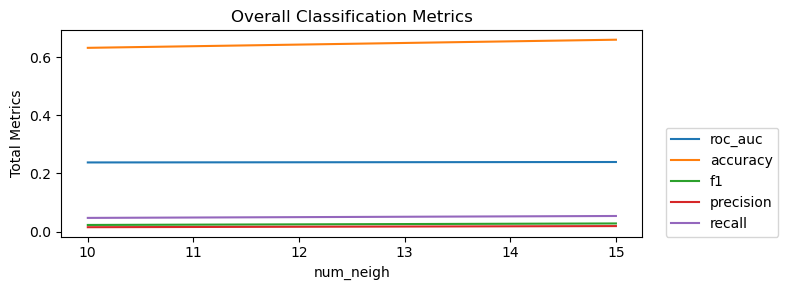

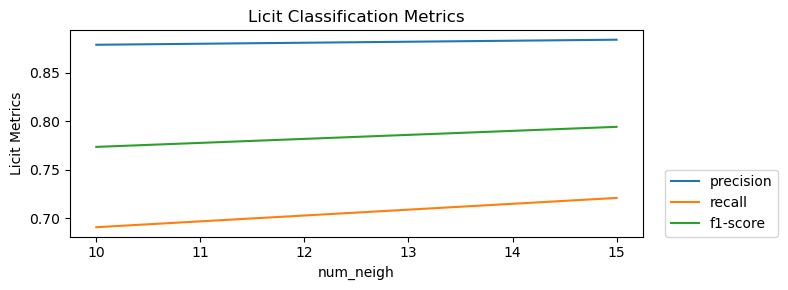

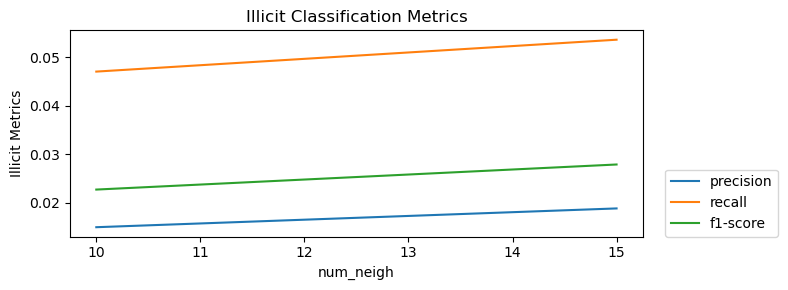

In [16]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Epochs

In [18]:
# metrics = create_metrics()
# para_change = "epoch"
# para_list = [50, 70]

# metrics = hyperparameter_loop("model", para_change, para_list, metrics)

In [19]:
# plot_metrics(metrics, para_list, para_change, x_log=False)

## DOMINANT using GAT backbone

In [5]:
config = {
        "model": {
            "hid_dim": 512,
            "num_layers": 6,
            "dropout": 0.2,
            "weight_decay": 0.0,
            "contamination": 0.1,
            "backbone": "gat",
            "lr": 0.005,
            "epoch": 30,
            "gpu":0.9,
            "batch_size": 2048,
            "num_neigh": 15,
            "weight": 0.5,
            "verbose": 1,
        },
        "data": {
            "use_aggregated": False,
            "use_temporal": False,
            "batch_size": 5000
        },
        "training": {
            "save_embeddings": False,
            "save_dir": "./saved_models",
        },
        "classifiers": ["rf", "mlp"],
    }

#### Number of layers

In [8]:
metrics = create_metrics()
para_change = "num_layers"
para_list = [5,6,7]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[10031, 93], edge_index=[2, 10037], y=[10031])
creating model with {'hid_dim': 512, 'num_layers': 5, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x00000249B14AC790>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 30, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 15, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.GATBackbone'>}
training model...
Epoch 0000: Loss 59965.8242 | 
Epoch 0001: Loss 16483.3475 | 
Epoch 0002: Loss 11869.7856 | 
Epoch 0003: Loss 5546.6517 | 
Epoch 0004: Loss 4500.5471 | 
Epoch 0005: Loss 3561.7118 | 
Epoch 0006: Loss 1567.8956 | 
Epoch 0007: Loss 870.4408 | 
Epoch 0008: Loss 780.6184 | 
Epoch 0009: Loss 497.3083 | 
Epoch 0010: Loss 393.3253 | 
Epoch 0011: Loss 355.9873 | 
Epoch 0012: Loss 228.6059 | 
Epoch 0013: Loss 186.4591 | 
Epoch 0014: Loss 157.7246 | 
Epoch 0015: Loss 141.7056 | 
Epoch 0016: Loss 108.0921 | 
Epoch 0017: Loss 131.0135 | 
Epoch 0018: Loss 105.1322 | 
Epoch 0019:

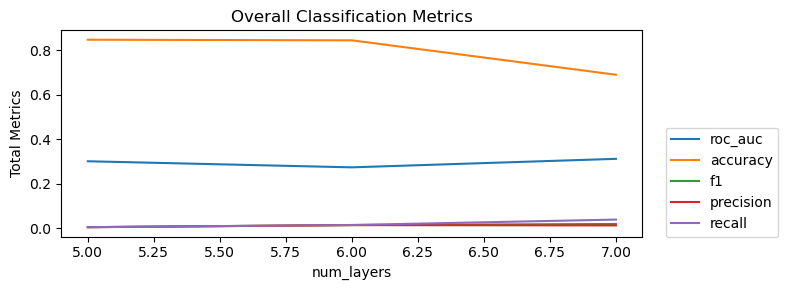

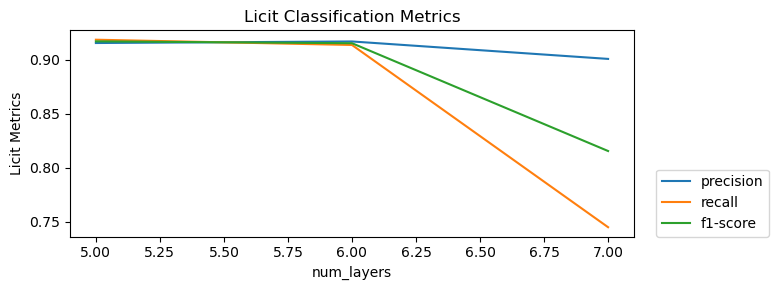

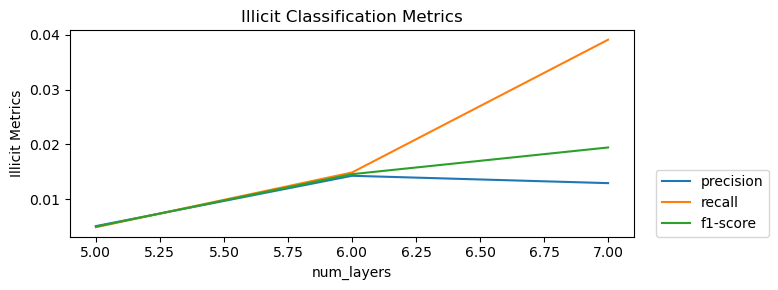

In [9]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Hidden Dimension

In [7]:
metrics = create_metrics()
para_change = "hid_dim"
para_list = [128, 256, 512]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[9996, 93], edge_index=[2, 10018], y=[9996])
creating model with {'hid_dim': 128, 'num_layers': 6, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x000001B4E11A8160>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 30, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 15, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.GATBackbone'>}
training model...
Epoch 0000: Loss 523.0239 | 
Epoch 0001: Loss 115.2215 | 
Epoch 0002: Loss 53.7609 | 
Epoch 0003: Loss 40.8660 | 
Epoch 0004: Loss 25.6607 | 
Epoch 0005: Loss 16.7406 | 
Epoch 0006: Loss 16.0127 | 
Epoch 0007: Loss 9.5336 | 
Epoch 0008: Loss 9.7135 | 
Epoch 0009: Loss 8.1298 | 
Epoch 0010: Loss 7.4713 | 
Epoch 0011: Loss 6.8442 | 
Epoch 0012: Loss 6.7429 | 
Epoch 0013: Loss 6.1880 | 
Epoch 0014: Loss 6.1581 | 
Epoch 0015: Loss 6.0460 | 
Epoch 0016: Loss 5.9545 | 
Epoch 0017: Loss 5.9778 | 
Epoch 0018: Loss 5.9300 | 
Epoch 0019: Loss 5.7368 | 
Epoch 0020: Loss 5.6877 |

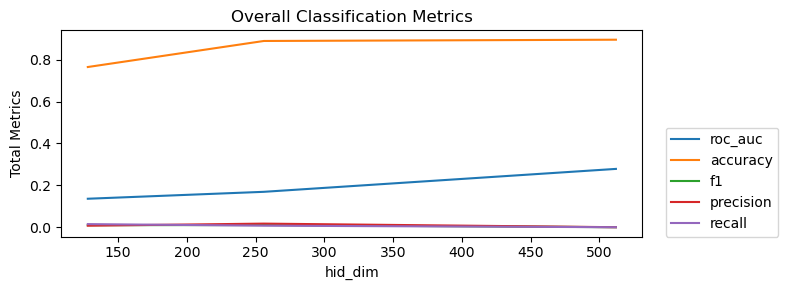

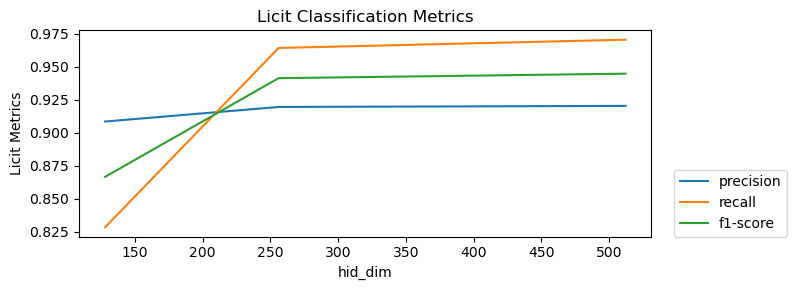

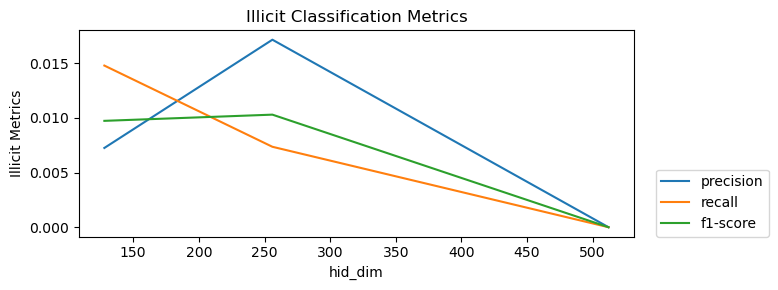

In [8]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Dropout

In [10]:
metrics = create_metrics()
para_change = "dropout"
para_list = [0.1, 0.15, 0.2]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[10018, 93], edge_index=[2, 10017], y=[10018])
creating model with {'hid_dim': 512, 'num_layers': 6, 'dropout': 0.1, 'weight_decay': 0.0, 'act': <function relu at 0x000001B4E11A8160>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 30, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 15, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.GATBackbone'>}
training model...
Epoch 0000: Loss 52238.4107 | 
Epoch 0001: Loss 12874.8674 | 
Epoch 0002: Loss 4128.4405 | 
Epoch 0003: Loss 2542.1635 | 
Epoch 0004: Loss 1234.7929 | 
Epoch 0005: Loss 1312.3324 | 
Epoch 0006: Loss 964.1343 | 
Epoch 0007: Loss 268.1032 | 
Epoch 0008: Loss 525.5319 | 
Epoch 0009: Loss 233.8571 | 
Epoch 0010: Loss 138.5279 | 
Epoch 0011: Loss 133.7034 | 
Epoch 0012: Loss 94.3743 | 
Epoch 0013: Loss 85.9477 | 
Epoch 0014: Loss 63.0919 | 
Epoch 0015: Loss 46.2339 | 
Epoch 0016: Loss 45.8384 | 
Epoch 0017: Loss 38.7951 | 
Epoch 0018: Loss 36.8580 | 
Epoch 0019: Loss 33.

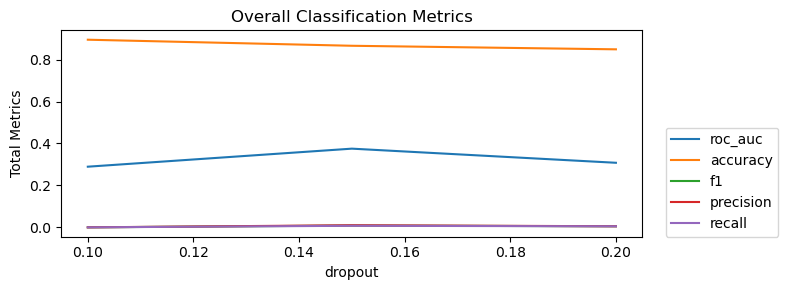

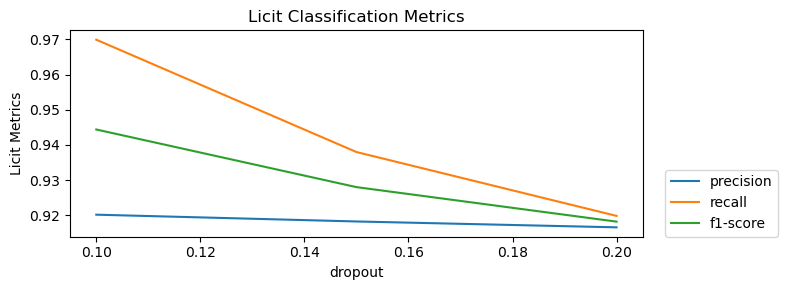

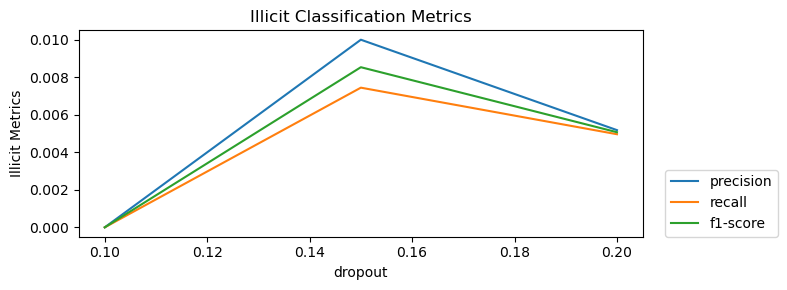

In [11]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Number of neighbors

In [13]:
metrics = create_metrics()
para_change = "num_neigh"
para_list = [10,15]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[10018, 93], edge_index=[2, 10017], y=[10018])
creating model with {'hid_dim': 512, 'num_layers': 6, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x000001B4E11A8160>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 30, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.GATBackbone'>}
training model...
Epoch 0000: Loss 46401.9451 | 
Epoch 0001: Loss 13837.7840 | 
Epoch 0002: Loss 3449.3370 | 
Epoch 0003: Loss 2039.1022 | 
Epoch 0004: Loss 1308.7063 | 
Epoch 0005: Loss 618.4771 | 
Epoch 0006: Loss 506.8011 | 
Epoch 0007: Loss 311.3029 | 
Epoch 0008: Loss 204.9312 | 
Epoch 0009: Loss 160.4807 | 
Epoch 0010: Loss 66.3422 | 
Epoch 0011: Loss 71.4042 | 
Epoch 0012: Loss 74.0559 | 
Epoch 0013: Loss 44.2415 | 
Epoch 0014: Loss 43.2383 | 
Epoch 0015: Loss 44.0538 | 
Epoch 0016: Loss 39.8007 | 
Epoch 0017: Loss 34.6071 | 
Epoch 0018: Loss 34.7432 | 
Epoch 0019: Loss 27.224

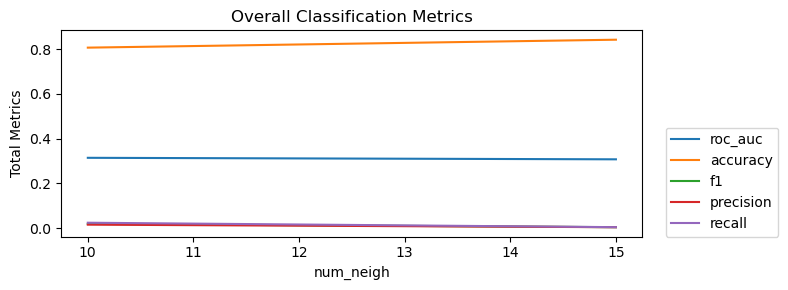

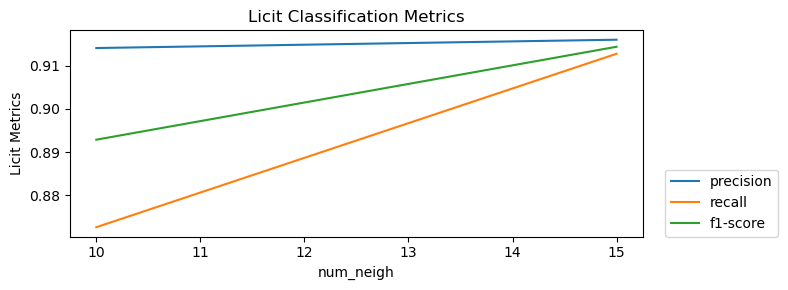

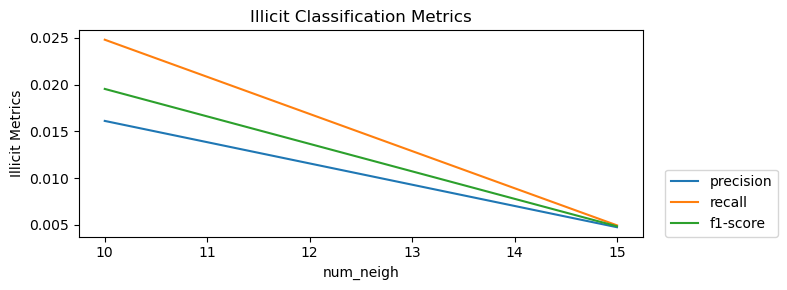

In [14]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Epochs

In [ ]:
# metrics = create_metrics()
# para_change = "epoch"
# para_list = [10, 20 , 30 , 40, 50]

# metrics = hyperparameter_loop("model", para_change, para_list, metrics)

In [ ]:
# plot_metrics(metrics, para_list, para_change, x_log=False)

## DOMINANT using hybrid GCN/GAT backbone

In [17]:
config = {
        "model": {
            "hid_dim": 512,
            "num_layers": 6,
            "dropout": 0.2,
            "weight_decay": 0.0,
            "contamination": 0.1,
            "backbone": "hybrid",
            "lr": 0.005,
            "epoch": 30,
            "gpu":0.9,
            "batch_size": 2048,
            "num_neigh": 10,
            "weight": 0.5,
            "verbose": 1,
        },
        "data": {
            "use_aggregated": False,
            "use_temporal": False,
            "batch_size": 5000
        },
        "training": {
            "save_embeddings": False,
            "save_dir": "./saved_models",
        },
        "classifiers": ["rf", "mlp"],
    }

#### Number of layers

In [19]:
metrics = create_metrics()
para_change = "num_layers"
para_list = [4, 5, 6, 7]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[10018, 93], edge_index=[2, 10017], y=[10018])
creating model with {'hid_dim': 512, 'num_layers': 4, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x000001B4E11A8160>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 30, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.HybridGCNGATBackbone'>}
training model...
Epoch 0000: Loss 5960.4033 | 
Epoch 0001: Loss 3601.3143 | 
Epoch 0002: Loss 2805.8678 | 
Epoch 0003: Loss 2519.0553 | 
Epoch 0004: Loss 2321.4221 | 
Epoch 0005: Loss 2107.5250 | 
Epoch 0006: Loss 1908.5360 | 
Epoch 0007: Loss 1734.1042 | 
Epoch 0008: Loss 1604.9927 | 
Epoch 0009: Loss 1486.2170 | 
Epoch 0010: Loss 1399.5606 | 
Epoch 0011: Loss 1290.6607 | 
Epoch 0012: Loss 1190.8319 | 
Epoch 0013: Loss 1074.8462 | 
Epoch 0014: Loss 992.3578 | 
Epoch 0015: Loss 869.3662 | 
Epoch 0016: Loss 756.8320 | 
Epoch 0017: Loss 589.2482 | 
Epoch 0018: Loss 486.7671 |

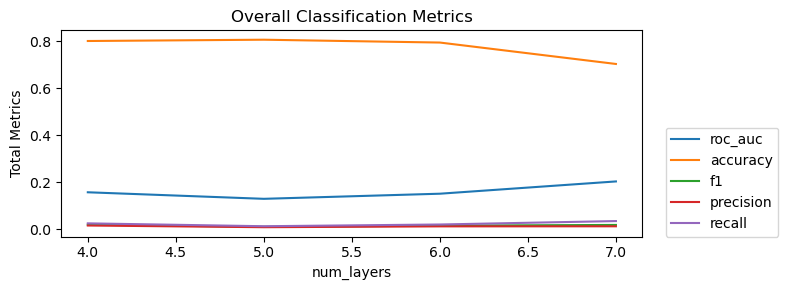

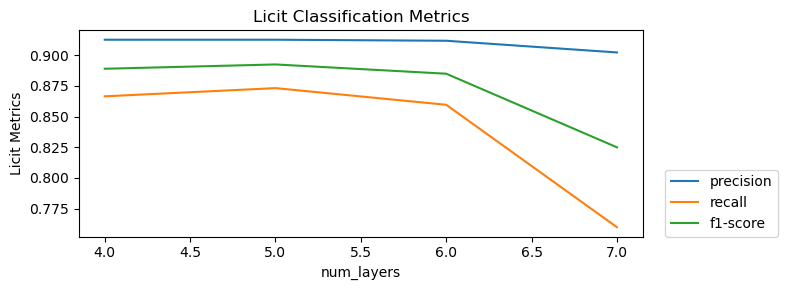

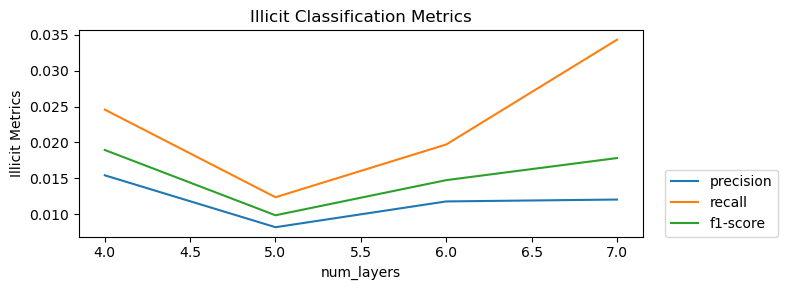

In [20]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Hidden Dimension

In [22]:
metrics = create_metrics()
para_change = "hid_dim"
para_list = [128, 256, 512, 1024]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[10018, 93], edge_index=[2, 10017], y=[10018])
creating model with {'hid_dim': 128, 'num_layers': 7, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x000001B4E11A8160>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 30, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.HybridGCNGATBackbone'>}
training model...
Epoch 0000: Loss 928.9526 | 
Epoch 0001: Loss 533.6292 | 
Epoch 0002: Loss 340.5729 | 
Epoch 0003: Loss 274.6301 | 
Epoch 0004: Loss 226.6206 | 
Epoch 0005: Loss 186.0522 | 
Epoch 0006: Loss 166.3354 | 
Epoch 0007: Loss 159.5491 | 
Epoch 0008: Loss 145.6491 | 
Epoch 0009: Loss 136.3619 | 
Epoch 0010: Loss 131.9936 | 
Epoch 0011: Loss 119.0752 | 
Epoch 0012: Loss 117.3660 | 
Epoch 0013: Loss 115.4400 | 
Epoch 0014: Loss 103.5255 | 
Epoch 0015: Loss 99.5743 | 
Epoch 0016: Loss 103.9833 | 
Epoch 0017: Loss 151.4659 | 
Epoch 0018: Loss 143.0371 | 
Epoch 0019: L

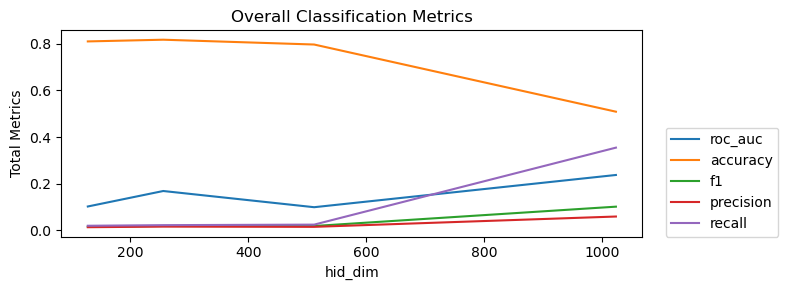

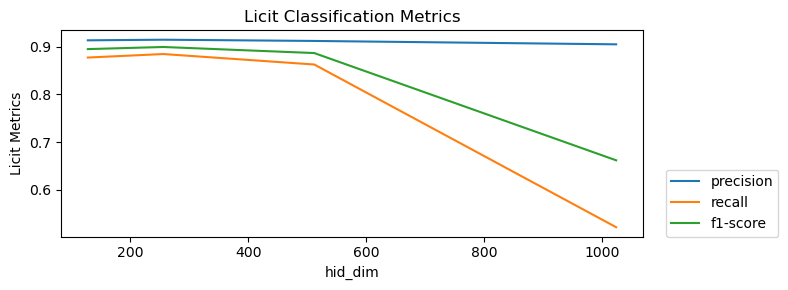

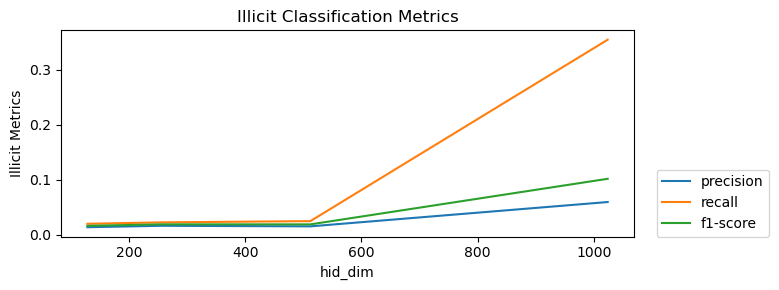

In [23]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Dropout

In [25]:
metrics = create_metrics()
para_change = "dropout"
para_list = [0.1, 0.15, 0.2]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[10018, 93], edge_index=[2, 10017], y=[10018])
creating model with {'hid_dim': 1024, 'num_layers': 7, 'dropout': 0.1, 'weight_decay': 0.0, 'act': <function relu at 0x000001B4E11A8160>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 30, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.HybridGCNGATBackbone'>}
training model...
Epoch 0000: Loss 10428.8739 | 
Epoch 0001: Loss 5368.3140 | 
Epoch 0002: Loss 4495.5653 | 
Epoch 0003: Loss 3541.0172 | 
Epoch 0004: Loss 3651.3322 | 
Epoch 0005: Loss 3148.7792 | 
Epoch 0006: Loss 2897.6341 | 
Epoch 0007: Loss 2536.0799 | 
Epoch 0008: Loss 2305.1787 | 
Epoch 0009: Loss 2058.2509 | 
Epoch 0010: Loss 1779.3932 | 
Epoch 0011: Loss 1480.4591 | 
Epoch 0012: Loss 1273.8038 | 
Epoch 0013: Loss 1183.1855 | 
Epoch 0014: Loss 1050.5456 | 
Epoch 0015: Loss 927.3038 | 
Epoch 0016: Loss 824.0440 | 
Epoch 0017: Loss 737.7152 | 
Epoch 0018: Loss 668.321

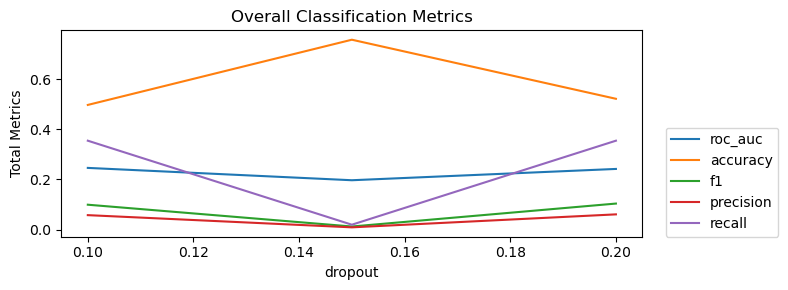

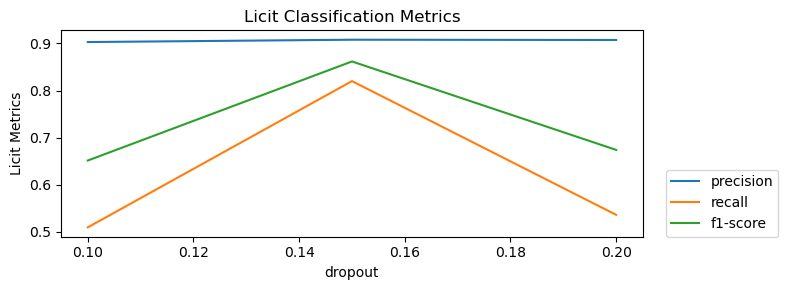

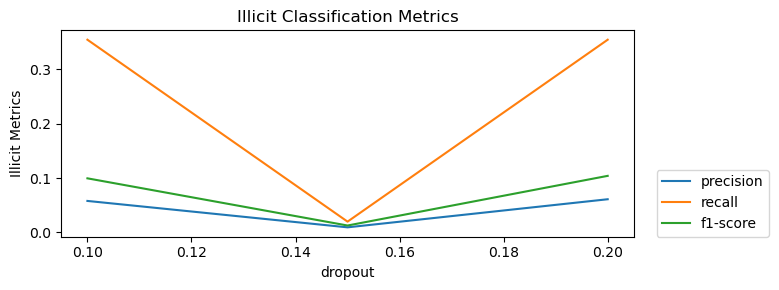

In [26]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Number of neighbors

In [28]:
metrics = create_metrics()
para_change = "num_neigh"
para_list = [10,15]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[10018, 93], edge_index=[2, 10017], y=[10018])
creating model with {'hid_dim': 1024, 'num_layers': 7, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x000001B4E11A8160>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 30, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.HybridGCNGATBackbone'>}
training model...
Epoch 0000: Loss 9960.0746 | 
Epoch 0001: Loss 5076.1860 | 
Epoch 0002: Loss 3841.7837 | 
Epoch 0003: Loss 3166.7147 | 
Epoch 0004: Loss 3060.0986 | 
Epoch 0005: Loss 2725.8623 | 
Epoch 0006: Loss 2614.6877 | 
Epoch 0007: Loss 2364.1611 | 
Epoch 0008: Loss 2144.8133 | 
Epoch 0009: Loss 1942.8408 | 
Epoch 0010: Loss 1749.0631 | 
Epoch 0011: Loss 1659.0621 | 
Epoch 0012: Loss 1523.1590 | 
Epoch 0013: Loss 1423.8403 | 
Epoch 0014: Loss 1298.0122 | 
Epoch 0015: Loss 1132.5769 | 
Epoch 0016: Loss 991.7832 | 
Epoch 0017: Loss 887.6758 | 
Epoch 0018: Loss 755.911

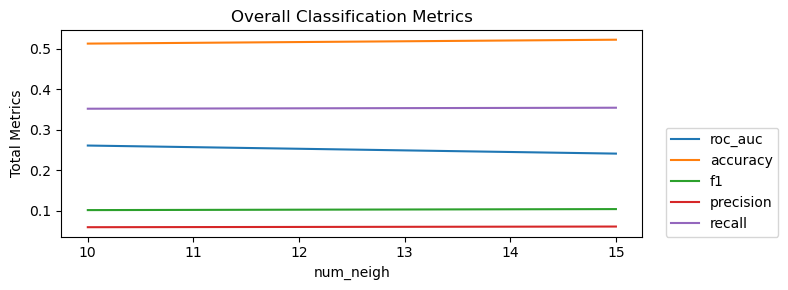

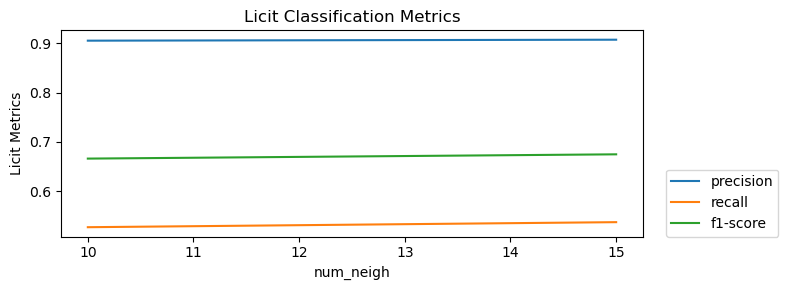

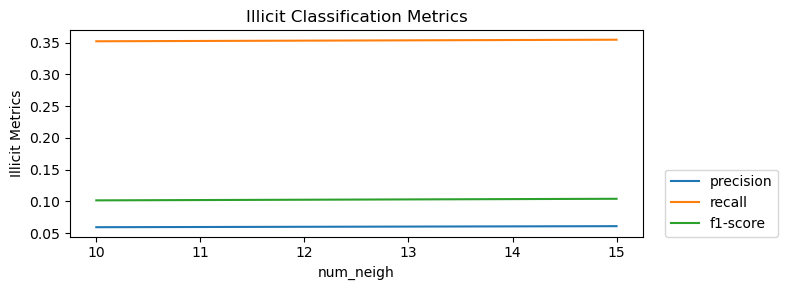

In [29]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Epochs

In [ ]:
# metrics = create_metrics()
# para_change = "epoch"
# para_list = [40, 50]

# metrics = hyperparameter_loop("model", para_change, para_list, metrics)

In [ ]:
# plot_metrics(metrics, para_list, para_change, x_log=False)

## DOMINANT using Skip-GCN Backbone

In [51]:
config = {
        "model": {
            "hid_dim": 512,
            "num_layers": 6,
            "dropout": 0.2,
            "weight_decay": 0.0,
            "contamination": 0.1,
            "backbone": "gcn_skip",
            "lr": 0.005,
            "epoch": 30,
            "gpu":0.9,
            "batch_size": 2048,
            "num_neigh": 10,
            "weight": 0.5,
            "verbose": 1,
        },
        "data": {
            "use_aggregated": False,
            "use_temporal": False,
            "batch_size": 5000
        },
        "training": {
            "save_embeddings": False,
            "save_dir": "./saved_models",
        },
        "classifiers": ["rf", "mlp"],
    }

#### Number of Layers

In [54]:
metrics = create_metrics()
para_change = "num_layers"
para_list = [4, 5, 6, 7]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[10018, 93], edge_index=[2, 10017], y=[10018])
creating model with {'hid_dim': 512, 'num_layers': 4, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x000001B4E11A8160>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 30, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.GCNSkipBackbone'>}
training model...
Epoch 0000: Loss 8435.9326 | 
Epoch 0001: Loss 2716.0663 | 
Epoch 0002: Loss 1449.7419 | 
Epoch 0003: Loss 920.6913 | 
Epoch 0004: Loss 657.6400 | 
Epoch 0005: Loss 501.4891 | 
Epoch 0006: Loss 414.2974 | 
Epoch 0007: Loss 349.9868 | 
Epoch 0008: Loss 311.8313 | 
Epoch 0009: Loss 279.1802 | 
Epoch 0010: Loss 244.4894 | 
Epoch 0011: Loss 237.7293 | 
Epoch 0012: Loss 217.6708 | 
Epoch 0013: Loss 215.2503 | 
Epoch 0014: Loss 198.5444 | 
Epoch 0015: Loss 190.0347 | 
Epoch 0016: Loss 191.4456 | 
Epoch 0017: Loss 181.0416 | 
Epoch 0018: Loss 183.6481 | 
Epoch 0019: Lo

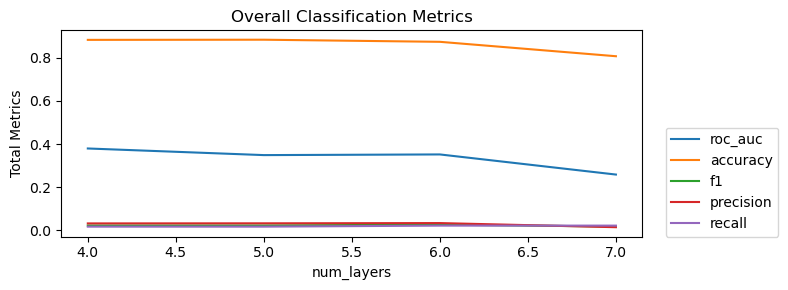

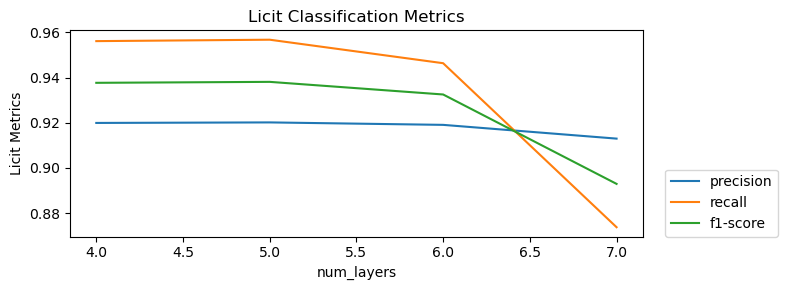

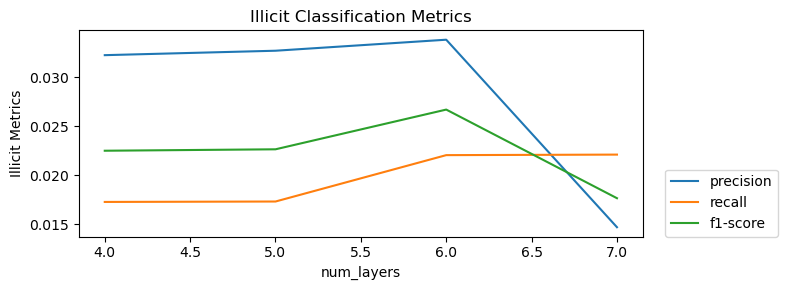

In [55]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Hidden Dimension

In [57]:
metrics = create_metrics()
para_change = "hid_dim"
para_list = [128, 256, 512, 1024]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[10018, 93], edge_index=[2, 10017], y=[10018])
creating model with {'hid_dim': 128, 'num_layers': 7, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x000001B4E11A8160>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 30, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.GCNSkipBackbone'>}
training model...
Epoch 0000: Loss 2571.5951 | 
Epoch 0001: Loss 379.8401 | 
Epoch 0002: Loss 219.0042 | 
Epoch 0003: Loss 175.5592 | 
Epoch 0004: Loss 148.7881 | 
Epoch 0005: Loss 131.0572 | 
Epoch 0006: Loss 112.4254 | 
Epoch 0007: Loss 103.7104 | 
Epoch 0008: Loss 94.9105 | 
Epoch 0009: Loss 83.4797 | 
Epoch 0010: Loss 84.6313 | 
Epoch 0011: Loss 77.9152 | 
Epoch 0012: Loss 74.5468 | 
Epoch 0013: Loss 68.6487 | 
Epoch 0014: Loss 65.3815 | 
Epoch 0015: Loss 65.4480 | 
Epoch 0016: Loss 64.9913 | 
Epoch 0017: Loss 60.7697 | 
Epoch 0018: Loss 56.1251 | 
Epoch 0019: Loss 57.7565 | 

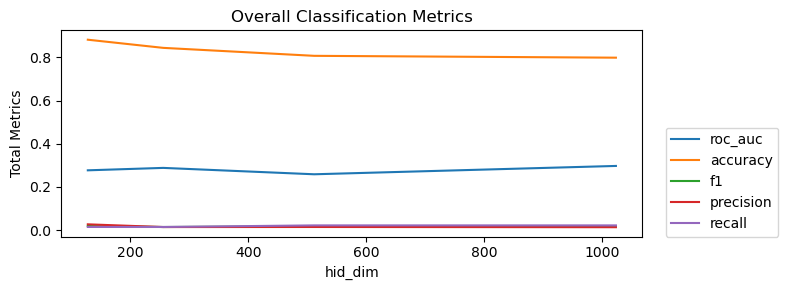

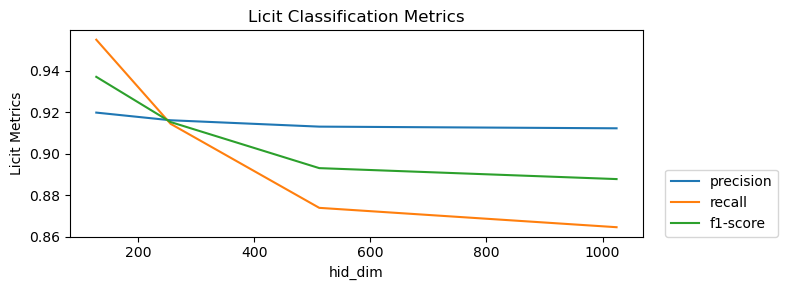

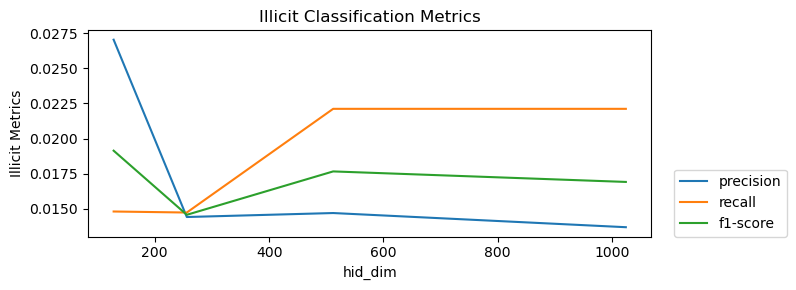

In [58]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Dropout

In [60]:
metrics = create_metrics()
para_change = "dropout"
para_list = [0.1, 0.15, 0.2]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[10018, 93], edge_index=[2, 10017], y=[10018])
creating model with {'hid_dim': 1024, 'num_layers': 7, 'dropout': 0.1, 'weight_decay': 0.0, 'act': <function relu at 0x000001B4E11A8160>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 30, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.GCNSkipBackbone'>}
training model...
Epoch 0000: Loss 27761.0116 | 
Epoch 0001: Loss 8337.2974 | 
Epoch 0002: Loss 5018.0390 | 
Epoch 0003: Loss 3517.6737 | 
Epoch 0004: Loss 2736.9285 | 
Epoch 0005: Loss 2250.4049 | 
Epoch 0006: Loss 1906.6120 | 
Epoch 0007: Loss 1616.4250 | 
Epoch 0008: Loss 1373.6783 | 
Epoch 0009: Loss 1176.5871 | 
Epoch 0010: Loss 1027.0913 | 
Epoch 0011: Loss 895.0087 | 
Epoch 0012: Loss 784.5946 | 
Epoch 0013: Loss 693.9788 | 
Epoch 0014: Loss 627.0505 | 
Epoch 0015: Loss 574.5332 | 
Epoch 0016: Loss 525.6811 | 
Epoch 0017: Loss 484.7983 | 
Epoch 0018: Loss 468.8624 | 
Epoc

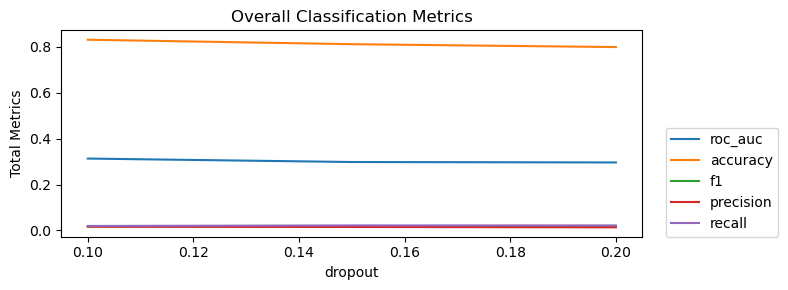

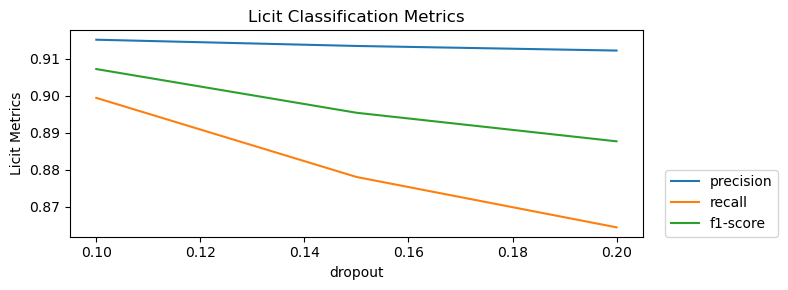

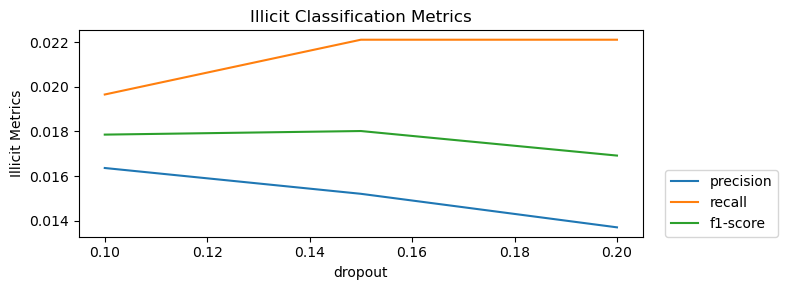

In [61]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Number of neighbors

In [63]:
metrics = create_metrics()
para_change = "num_neigh"
para_list = [10,15]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[10018, 93], edge_index=[2, 10017], y=[10018])
creating model with {'hid_dim': 1024, 'num_layers': 7, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x000001B4E11A8160>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 30, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.GCNSkipBackbone'>}
training model...
Epoch 0000: Loss 27631.4789 | 
Epoch 0001: Loss 8272.6289 | 
Epoch 0002: Loss 4547.5201 | 
Epoch 0003: Loss 3022.3880 | 
Epoch 0004: Loss 2315.7215 | 
Epoch 0005: Loss 1848.5711 | 
Epoch 0006: Loss 1562.5491 | 
Epoch 0007: Loss 1317.4299 | 
Epoch 0008: Loss 1088.9798 | 
Epoch 0009: Loss 976.2572 | 
Epoch 0010: Loss 871.3982 | 
Epoch 0011: Loss 764.9703 | 
Epoch 0012: Loss 696.9303 | 
Epoch 0013: Loss 662.3599 | 
Epoch 0014: Loss 603.6956 | 
Epoch 0015: Loss 580.4954 | 
Epoch 0016: Loss 569.7971 | 
Epoch 0017: Loss 532.7211 | 
Epoch 0018: Loss 501.1208 | 
Epoch 

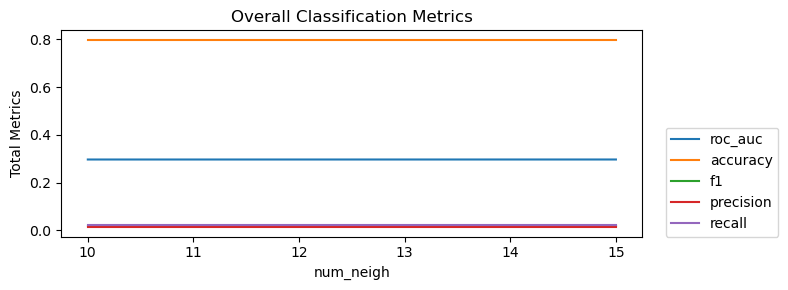

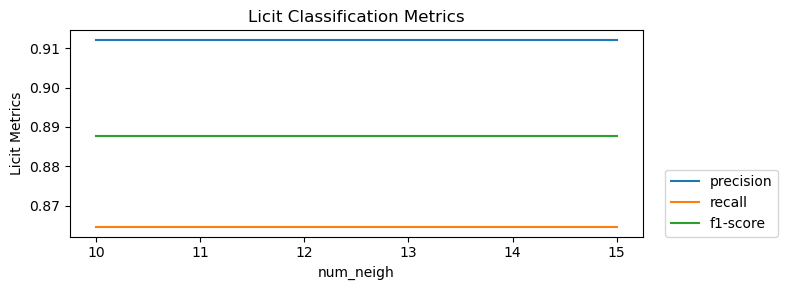

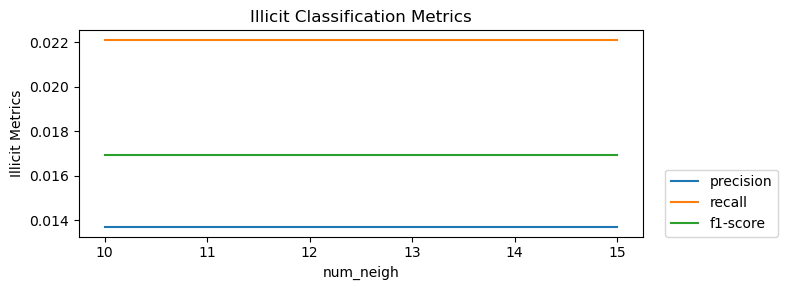

In [64]:
plot_metrics(metrics, para_list, para_change, x_log=False)